In [47]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/Tasnim/Downloads/work760_dataset_2.csv", nrows=200)
data.head()
print(data.head())

  countryname countrycode countrycode2  countrycode_IMF  year  quarter  \
0     Albania         ALB           AL              914  1996        1   
1     Albania         ALB           AL              914  1996        2   
2     Albania         ALB           AL              914  1996        3   
3     Albania         ALB           AL              914  1996        4   
4     Albania         ALB           AL              914  1997        1   

   Public_PD_inflows  Gov_PD_inflows  CB_PD_inflows  Bank_PD_inflows  ...  \
0                  0               0              0                0  ...   
1                  0               0              0                0  ...   
2                  0               0              0                0  ...   
3                  0               0              0                0  ...   
4                  0               0              0                0  ...   

   CB_OID_inflows  Bank_OID_inflows  Corp_OID_inflows  Public_PD_outflows  \
0              

In [12]:
missing_values = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 countryname              0
countrycode              0
countrycode2             0
countrycode_IMF          0
year                     0
quarter                  0
Public_PD_inflows        0
Gov_PD_inflows           0
CB_PD_inflows            0
Bank_PD_inflows          0
Corp_PD_inflows          0
Public_OID_inflows       0
Gov_OID_inflows          0
CB_OID_inflows           0
Bank_OID_inflows         0
Corp_OID_inflows         0
Public_PD_outflows     143
Bank_PD_outflows        95
Corp_PD_outflows       143
Public_OID_outflows     76
Bank_OID_outflows       76
Corp_OID_outflows       76
Reserves_outflows       76
dtype: int64


In [13]:
# Résumé statistique
print(data.describe())

       countrycode_IMF         year    quarter  Public_PD_inflows  \
count       200.000000   200.000000  200.00000         200.000000   
mean        764.000000  2008.000000    2.50000           0.045000   
std         150.376412     7.229198    1.12084           0.321702   
min         614.000000  1996.000000    1.00000           0.000000   
25%         614.000000  2002.000000    1.75000           0.000000   
50%         764.000000  2008.000000    2.50000           0.000000   
75%         914.000000  2014.000000    3.25000           0.000000   
max         914.000000  2020.000000    4.00000           3.000000   

       Gov_PD_inflows  CB_PD_inflows  Bank_PD_inflows  Corp_PD_inflows  \
count      200.000000          200.0            200.0            200.0   
mean         0.045000            0.0              0.0              0.0   
std          0.321702            0.0              0.0              0.0   
min          0.000000            0.0              0.0              0.0   
25%     

In [14]:
# Vérifier les colonnes contenant des valeurs négatives
negative_values = data.select_dtypes(include='number').lt(0).sum()
print("Colonnes avec des valeurs négatives :\n", negative_values)

Colonnes avec des valeurs négatives :
 countrycode_IMF         0
year                    0
quarter                 0
Public_PD_inflows       0
Gov_PD_inflows          0
CB_PD_inflows           0
Bank_PD_inflows         0
Corp_PD_inflows         0
Public_OID_inflows      5
Gov_OID_inflows         3
CB_OID_inflows          1
Bank_OID_inflows        5
Corp_OID_inflows       18
Public_PD_outflows      0
Bank_PD_outflows        0
Corp_PD_outflows        0
Public_OID_outflows     0
Bank_OID_outflows       6
Corp_OID_outflows       7
Reserves_outflows      11
dtype: int64


In [16]:
# Supprimer les lignes contenant des valeurs manquantes
data_cleaned = data.dropna()

# Ou remplir les valeurs manquantes avec une valeur par défaut (ex. : 0)
data_filled = data.fillna(0)

In [17]:
# Convertir toutes les colonnes pertinentes en numériques, les erreurs seront ignorées pour les colonnes non numériques
data = data.apply(pd.to_numeric, errors='coerce')
# Remplacer les valeurs négatives par 0
data_corrected = data.where(data >= 0, 0)

In [18]:
data_cleaned = data_corrected.dropna()
data_cleaned = data_corrected.fillna(0)


In [19]:
# Résumé statistique des données nettoyées
print(data_cleaned.describe())

# Affichage des premières lignes
print(data_cleaned.head())


       countryname  countrycode  countrycode2  countrycode_IMF         year  \
count        200.0        200.0         200.0       200.000000   200.000000   
mean           0.0          0.0           0.0       764.000000  2008.000000   
std            0.0          0.0           0.0       150.376412     7.229198   
min            0.0          0.0           0.0       614.000000  1996.000000   
25%            0.0          0.0           0.0       614.000000  2002.000000   
50%            0.0          0.0           0.0       764.000000  2008.000000   
75%            0.0          0.0           0.0       914.000000  2014.000000   
max            0.0          0.0           0.0       914.000000  2020.000000   

         quarter  Public_PD_inflows  Gov_PD_inflows  CB_PD_inflows  \
count  200.00000         200.000000      200.000000          200.0   
mean     2.50000           0.045000        0.045000            0.0   
std      1.12084           0.321702        0.321702            0.0   
min     

In [20]:
# Trier les données par la colonne 'Public_PD_inflows' de manière croissante
data_sorted_asc = data.sort_values(by='Public_PD_inflows', ascending=True)
print(data_sorted_asc)


     countryname  countrycode  countrycode2  countrycode_IMF  year  quarter  \
0            NaN          NaN           NaN              914  1996        1   
125          NaN          NaN           NaN              614  2002        2   
126          NaN          NaN           NaN              614  2002        3   
127          NaN          NaN           NaN              614  2002        4   
128          NaN          NaN           NaN              614  2003        1   
..           ...          ...           ...              ...   ...      ...   
179          NaN          NaN           NaN              614  2015        4   
97           NaN          NaN           NaN              914  2020        2   
59           NaN          NaN           NaN              914  2010        4   
189          NaN          NaN           NaN              614  2018        2   
195          NaN          NaN           NaN              614  2019        4   

     Public_PD_inflows  Gov_PD_inflows  CB_PD_inflo

In [26]:
mean_value = np.mean(data['Public_PD_inflows'])
print(f"Moyenne : {mean_value}")


Moyenne : 0.045


In [27]:
median_value = np.median(data['Public_PD_inflows'])
print(f"Médiane : {median_value}")


Médiane : 0.0


In [28]:
std_dev = np.std(data['Public_PD_inflows'])
print(f"Écart-type : {std_dev}")


Écart-type : 0.3208971797944009


In [29]:
variance = np.var(data['Public_PD_inflows'])
print(f"Variance : {variance}")


Variance : 0.10297500000000005


In [30]:
min_value = np.min(data['Public_PD_inflows'])
max_value = np.max(data['Public_PD_inflows'])
print(f"Min : {min_value}, Max : {max_value}")


Min : 0, Max : 3


In [31]:
sum_value = np.sum(data['Public_PD_inflows'])
print(f"Somme : {sum_value}")


Somme : 9


In [32]:
q25 = np.percentile(data['Public_PD_inflows'], 25)
q50 = np.percentile(data['Public_PD_inflows'], 50)  # Médiane
q75 = np.percentile(data['Public_PD_inflows'], 75)
print(f"Quantiles (25%, 50%, 75%) : {q25}, {q50}, {q75}")


Quantiles (25%, 50%, 75%) : 0.0, 0.0, 0.0


In [33]:
# Calculer des statistiques descriptives avec pandas
desc_stats = data['Public_PD_inflows'].describe()
print(desc_stats)


count    200.000000
mean       0.045000
std        0.321702
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: Public_PD_inflows, dtype: float64


In [34]:
# Sélectionner les colonnes des flux de capitaux par secteur
columns_of_interest = [
    'Public_PD_inflows', 'Gov_PD_inflows', 'CB_PD_inflows', 
    'Bank_PD_inflows', 'Corp_PD_inflows', 
    'Public_OID_inflows', 'Gov_OID_inflows', 'CB_OID_inflows',
    'Bank_OID_inflows', 'Corp_OID_inflows'
]


In [35]:
# Créer un DataFrame qui regroupe les flux entrants par secteur
sector_inflows = data[['countryname', 'Public_PD_inflows', 'Gov_PD_inflows', 'CB_PD_inflows', 'Bank_PD_inflows', 'Corp_PD_inflows']]

# Calculer la somme des flux entrants par secteur
sector_inflows_sum = sector_inflows.sum(axis=0).drop('countryname')
print("Volumes de flux entrants par secteur :\n", sector_inflows_sum)


Volumes de flux entrants par secteur :
 Public_PD_inflows    9
Gov_PD_inflows       9
CB_PD_inflows        0
Bank_PD_inflows      0
Corp_PD_inflows      0
dtype: object


In [38]:
# Créer un DataFrame pour les flux sortants
sector_outflows = data[['countryname', 'Public_OID_inflows', 'Gov_OID_inflows', 'CB_OID_inflows', 'Bank_OID_inflows', 'Corp_OID_inflows']]

# Calculer la somme des flux sortants par secteur
sector_outflows_sum = sector_outflows.sum(axis=0).drop('countryname')
print("Volumes de flux sortants par secteur :\n", sector_outflows_sum)

# Comparer les flux entrants et sortants pour chaque secteur
comparison = sector_inflows_sum - sector_outflows_sum
print("\nDifférence entre les flux entrants et sortants par secteur :\n", comparison)


Volumes de flux sortants par secteur :
 Public_OID_inflows    21
Gov_OID_inflows       19
CB_OID_inflows         3
Bank_OID_inflows       0
Corp_OID_inflows      -6
dtype: object

Différence entre les flux entrants et sortants par secteur :
 Bank_OID_inflows      NaN
Bank_PD_inflows       NaN
CB_OID_inflows        NaN
CB_PD_inflows         NaN
Corp_OID_inflows      NaN
Corp_PD_inflows       NaN
Gov_OID_inflows       NaN
Gov_PD_inflows        NaN
Public_OID_inflows    NaN
Public_PD_inflows     NaN
dtype: object


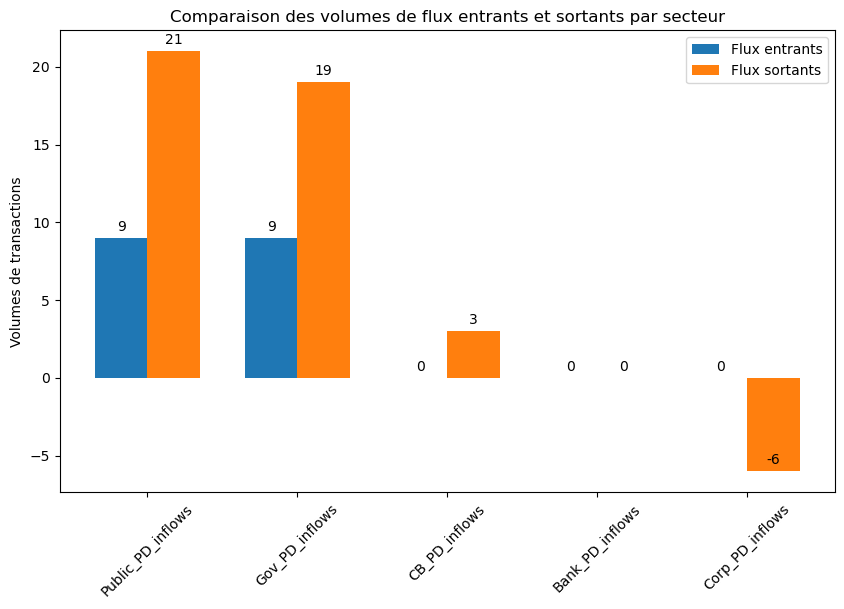

In [39]:
import matplotlib.pyplot as plt

# Préparer les données pour le graphique
sector_names = sector_inflows_sum.index
inflows_values = sector_inflows_sum.values
outflows_values = sector_outflows_sum.values

# Créer le graphique
x = np.arange(len(sector_names))  # positions des secteurs
width = 0.35  # largeur des barres

fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour les flux entrants et sortants
rects1 = ax.bar(x - width/2, inflows_values, width, label='Flux entrants')
rects2 = ax.bar(x + width/2, outflows_values, width, label='Flux sortants')

# Ajouter des labels, titres et personnaliser l'affichage
ax.set_ylabel('Volumes de transactions')
ax.set_title('Comparaison des volumes de flux entrants et sortants par secteur')
ax.set_xticks(x)
ax.set_xticklabels(sector_names, rotation=45)
ax.legend()

# Afficher les valeurs sur les barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # décalage vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Afficher le graphique
plt.show()


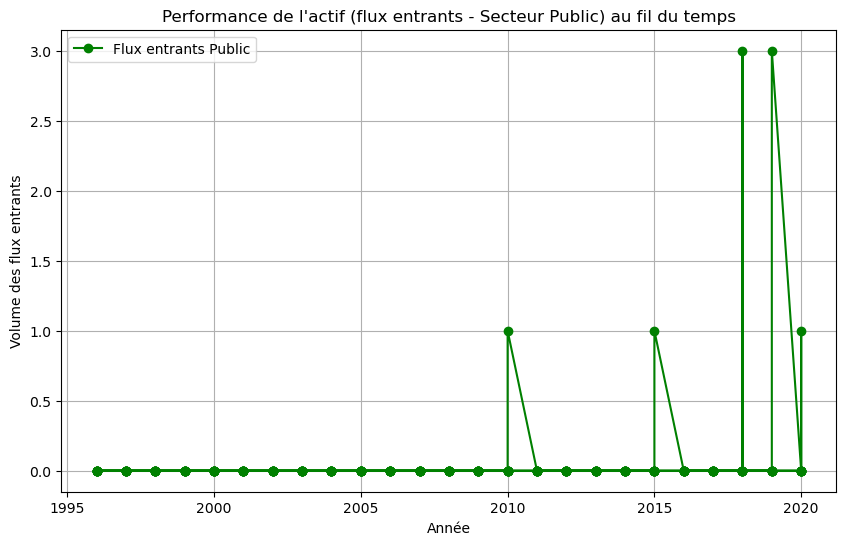

In [40]:
# Sélectionner les données pertinentes (par exemple, les flux entrants du secteur Public au fil des années)
asset_data = data[['year', 'Public_PD_inflows']]

# Tracer la performance de l'actif au fil des années
plt.figure(figsize=(10, 6))
plt.plot(asset_data['year'], asset_data['Public_PD_inflows'], label='Flux entrants Public', marker='o', color='green')
plt.title("Performance de l'actif (flux entrants - Secteur Public) au fil du temps")
plt.xlabel('Année')
plt.ylabel('Volume des flux entrants')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Sélectionner les colonnes pertinentes
data_model = data[['year', 'quarter', 'Public_PD_inflows']]

# Supprimer les lignes avec des valeurs manquantes
data_model = data_model.dropna()

# Définir les variables indépendantes (features) et dépendantes (target)
X = data_model[['year', 'quarter']]  # Features : année et trimestre
y = data_model['Public_PD_inflows']  # Target : flux entrants publics

In [44]:
# Diviser les données en train (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Créer le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

In [51]:
# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")

# Calculer le coefficient de détermination R^2
r2 = r2_score(y_test, y_pred)
print(f"R^2 : {r2}")


Erreur quadratique moyenne (MSE) : 0.00895256914113154
R^2 : 0.0


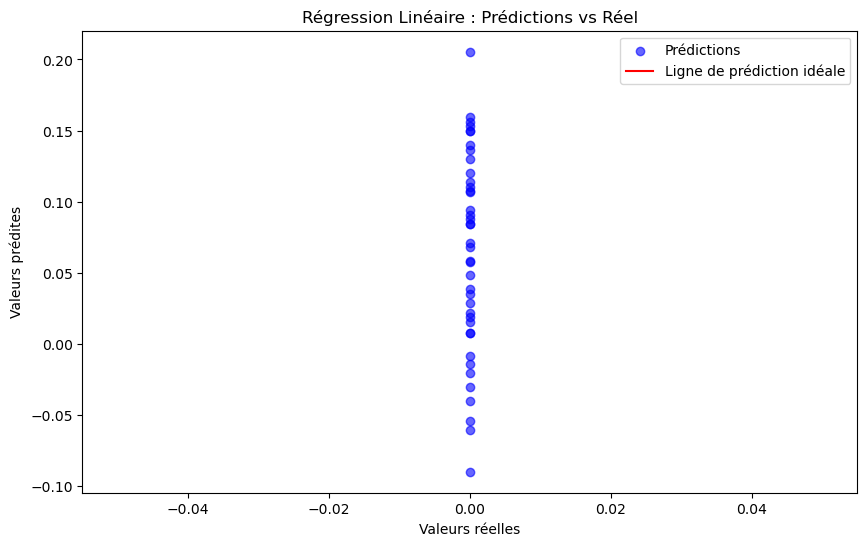

In [52]:
# Tracer les valeurs réelles vs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label="Prédictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label="Ligne de prédiction idéale")
plt.title('Régression Linéaire : Prédictions vs Réel')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.show()
